# Module - 4

In [1]:
#import library packages
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load given dataset
data = pd.read_csv("CO2.csv")

In [4]:
df = data.dropna()

In [5]:
df = df.rename({'Model Year': 'Model_Year', 'Vehicle Class': 'Vehicle_Class', 'Engine Size(L)': 'Engine_Size',
                'Fuel Type': 'Fuel_Type', 'Fuel Consumption (City (L/100 km)': 'FC_City',
                'Fuel Consumption(Hwy (L/100 km))': 'FC_Hwy', 'Fuel Consumption(Comb (L/100 km))': 'FC_Comb_km',
                'Fuel Consumption(Comb (mpg))': 'FC_Comb_mpg', 'CO2 Emission Rating': 'CO2_Emission_Rating'}, axis=1)

In [6]:
df['CO2_Emission_Rating'].value_counts()

5    616
3    396
7    388
6    378
1    114
Name: CO2_Emission_Rating, dtype: int64

In [7]:
df['CO2_Emission_Rating'] = df.CO2_Emission_Rating.map({1:0,3:0,5:1,6:2,7:2})

In [8]:
df['CO2_Emission_Rating'].value_counts()

2    766
1    616
0    510
Name: CO2_Emission_Rating, dtype: int64

In [9]:
df.columns

Index(['Sl.No', 'Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Type', 'FC_City', 'FC_Hwy',
       'FC_Comb_km', 'FC_Comb_mpg', 'CO2_Emission_Rating'],
      dtype='object')

In [10]:
del df['Sl.No']
del df['Model_Year']
del df['Make']
del df['Model']
del df['Vehicle_Class']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 1891
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine_Size          1892 non-null   float64
 1   Cylinders            1892 non-null   int64  
 2   Transmission         1892 non-null   object 
 3   Fuel_Type            1892 non-null   object 
 4   FC_City              1892 non-null   float64
 5   FC_Hwy               1892 non-null   float64
 6   FC_Comb_km           1892 non-null   float64
 7   FC_Comb_mpg          1892 non-null   int64  
 8   CO2_Emission_Rating  1892 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 147.8+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
col = ['Transmission', 'Fuel_Type']
label = LabelEncoder()
for i in col:
    df[i] = label.fit_transform(df[i]).astype(int)

In [13]:
df.head()

,Engine_Size,Cylinders,Transmission,Fuel_Type,FC_City,FC_Hwy,FC_Comb_km,FC_Comb_mpg,CO2_Emission_Rating
0,2.4,4,7,3,9.9,7.0,8.6,33,0
1,3.5,6,8,3,12.6,9.4,11.2,25,1
2,2.0,4,8,3,11.0,8.6,9.9,29,2
3,2.0,4,8,3,11.3,9.1,10.3,27,2
4,2.0,4,8,3,11.2,8.0,9.8,29,2


In [14]:
inputs = df.drop(labels='CO2_Emission_Rating', axis=1)
output = df.loc[:,'CO2_Emission_Rating']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=1, stratify=output)
print("Number of Training Dataset: ", len(X_train))
print("Number of Testing Dataset: ", len(X_test))
print("Total Number of Dataset: ", len(X_train)+len(X_test))

Number of Training Dataset:  1324
Number of Testing Dataset:  568
Total Number of Dataset:  1892


XGBoost Algorithm

In [16]:
import xgboost as xg
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

Training Process

In [17]:
xgb = xg.XGBClassifier()
xgb.fit(X_train,y_train)
predicted_xgb = xgb.predict(X_test)

Getting Accuracy

In [18]:
accuracy = accuracy_score(y_test,predicted_xgb)
print('Accuracy of XGBoost Classifier is: ',accuracy*100)

Accuracy of XGBoost Classifier is:  94.8943661971831


Finding Clasiification Report

In [19]:
cr = classification_report(y_test,predicted_xgb)
print('Classification report\n---------------------\n',cr)

Classification report
---------------------
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       153
           1       0.92      0.96      0.94       185
           2       0.95      0.96      0.95       230

    accuracy                           0.95       568
   macro avg       0.95      0.95      0.95       568
weighted avg       0.95      0.95      0.95       568



Finding Confusion Matrix

In [20]:
cm = confusion_matrix(y_test,predicted_xgb)
print('Confusion matrix\n----------------\n',cm)

Confusion matrix
----------------
 [[141   8   4]
 [  0 178   7]
 [  2   8 220]]


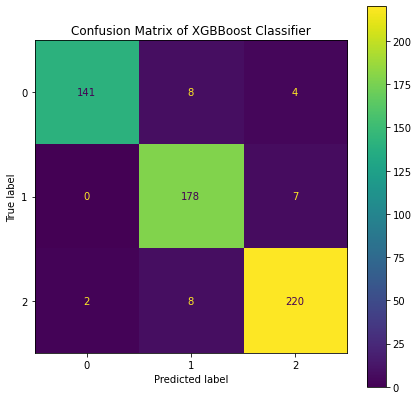

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(xgb, X_test, y_test, ax=ax)
plt.title('Confusion Matrix of XGBBoost Classifier')
plt.show()

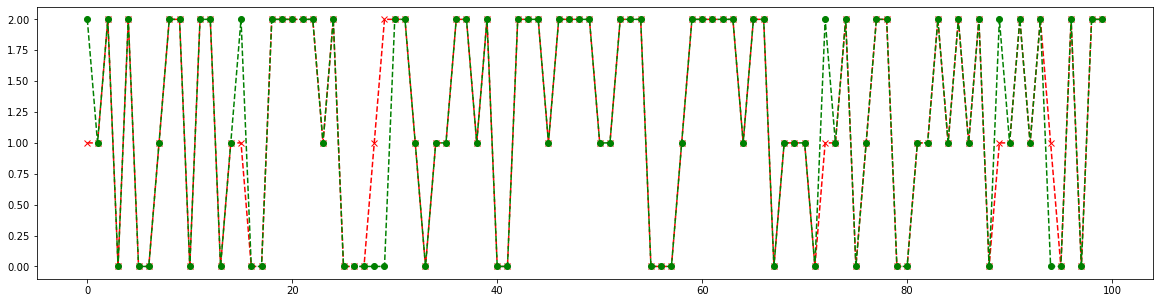

In [22]:
DF = pd.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = predicted_xgb
DF.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(DF["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()